In [5]:
# Procesamiento de datos con Python - Llano Javier
import pandas as pd

In [6]:
archivo_csv = "Base de datos\world_university_rank.csv"

dataframe = pd.read_csv(archivo_csv, encoding='ISO-8859-1')

In [7]:
print("Las primeras tres universidades rankeadas son: ")
dataframe.head(3)

Las primeras tres universidades rankeadas son: 


,Rank,University name,locationLocation,Number of Studnet,Number of student per staffs,International Student,Female : male ratio
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53


In [8]:
print("Las últimas universidades en el ranking son: ")
dataframe.tail()

Las últimas universidades en el ranking son: 


,Rank,University name,locationLocation,Number of Studnet,Number of student per staffs,International Student,Female : male ratio
2340,Reporter,York St John University,United Kingdom,"6,315",18.6,12%,65 : 35
2341,Reporter,"Yusuf Maitama Sule University, Kano",Nigeria,"12,880",33.0,0%,48 : 52
2342,Reporter,Zhytomyr Polytechnic State University,Ukraine,"3,869",15.4,1%,34 : 66
2343,Reporter,Ziauddin University,Pakistan,"4,906",8.8,1%,63 : 37
2344,Reporter,Zarqa University,Jordan,"5,768",18.1,32%,47 : 53


In [9]:
# Estadísticas descriptivas
dataframe.describe()

# Contar valores únicos en una columna
print("La cantidad de universidades por país en el ranking son:")
dataframe['locationLocation'].value_counts()

La cantidad de universidades por país en el ranking son:


United States     179
United Kingdom    163
Japan             152
India             101
China              95
                 ... 
Jamaica             1
Nepal               1
Mozambique          1
Malta               1
Kosovo              1
Name: locationLocation, Length: 117, dtype: int64

In [10]:
# Cambiar nombres a las columnas
nuevos_nombres=['Puesto','Universidad','Ubicación','Cantidad de Estudiantes','Cantidad de Estudiantes por Personal Docente','Estudiantes Internacionales','Relación mujeres:hombres']
# Asignar los nuevos nombres a las columnas
dataframe.columns = nuevos_nombres

In [21]:
# Obtener los tipos de datos de cada columna en el DataFrame
tipos_de_datos = dataframe.dtypes
print(tipos_de_datos)

Puesto                                          float64
Universidad                                      object
Ubicación                                        object
Cantidad de Estudiantes                          object
Cantidad de Estudiantes por Personal Docente    float64
Estudiantes Internacionales                      object
Relación mujeres:hombres                         object
dtype: object


In [27]:
# Reemplazar las comas por nada (eliminarlas)
dataframe["Cantidad de Estudiantes"] = dataframe["Cantidad de Estudiantes"].replace(",", "", regex=True)

# Cambiar tipo de dato de Cantidad de Estudiantes
dataframe["Cantidad de Estudiantes"] = dataframe["Cantidad de Estudiantes"].astype(int)

# Columna a filtrar
columna_a_filtrar = 'Puesto'

# Convierte los valores en la columna a valores numéricos
dataframe[columna_a_filtrar] = pd.to_numeric(dataframe[columna_a_filtrar], errors='coerce')

# Filtra las filas que contienen valores numéricos en la columna filtrada
dataframe_filtrado = dataframe[dataframe[columna_a_filtrar].notna()]
print("El dataset filtrado solo con valores numéricos en la columna Puesto es:")
dataframe_filtrado

El dataset filtrado solo con valores numéricos en la columna Puesto es:


,Puesto,Universidad,Ubicación,Cantidad de Estudiantes,Cantidad de Estudiantes por Personal Docente,Estudiantes Internacionales,Relación mujeres:hombres
0,1.0,University of Oxford,United Kingdom,20965,10.6,42%,48 : 52
1,2.0,Harvard University,United States,21887,9.6,25%,50 : 50
2,3.0,University of Cambridge,United Kingdom,20185,11.3,39%,47 : 53
3,3.0,Stanford University,United States,16164,7.1,24%,46 : 54
4,5.0,Massachusetts Institute of Technology,United States,11415,8.2,33%,40 : 60
...,...,...,...,...,...,...,...
195,196.0,University of Erlangen-Nuremberg,Germany,30303,43.4,13%,51 : 49
196,196.0,Sichuan University,China,49543,15.8,6%,NaN
197,198.0,Durham University,United Kingdom,18425,14.1,35%,54 : 46
198,198.0,Queenâs University Belfast,United Kingdom,19060,15.8,39%,57 : 43


Cantidad de estudiantes por país


<AxesSubplot:xlabel='Ubicación'>

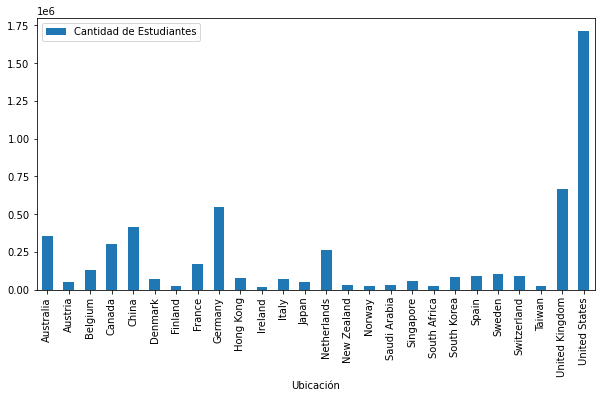

In [47]:
import matplotlib.pyplot as plt
plt.close("all")
ubicacion=dataframe_filtrado.groupby("Ubicación")[["Cantidad de Estudiantes"]].sum()
print("Cantidad de estudiantes por país")
# Aumenta el límite del eje y
ubicacion.plot.bar(figsize=(10,5))